In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 09 

## Review: Lecture 04/05 (bootstrap)
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [4]:
# original sample

births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


**Task**
- define a function to generate a single bootstrap mean of the Maternal Age
- generate 3000 bootstrap means
- calculate the endpoints of the 95% confidence interval (using `percentile()`)
- generate a plot of the bootstrap mean distribution and the confidence interval (a yellow bar at y=0)

In [5]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [6]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [7]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

print(f"Left End: {left}")
print(f"Right End: {right}")

Left End: 26.900340715502555
Right End: 27.55281090289608


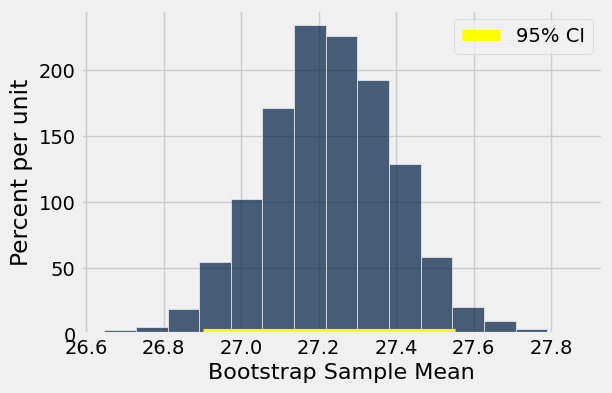

In [9]:
resampled_means = Table().with_columns('Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8, label='95% CI')
plots.legend();

## Method Based on CLT

**Tasks**

calculate the 
- sample size
- sample average
- sample SD

In [10]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")

Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.815360404190897


If we knew our population SD, we could get our sample average SD from 

$SD = ( \frac{\text{Population SD}}{\sqrt{\text{Sample_Size}}}) = \sigma_{sm} = ( \frac{\sigma_{pop}}{\sqrt{\text{Sample_Size}}})$

And then construct our confidence interval as $[\mu - 2*\sigma_{sm}, \mu + 2*\sigma_{sm}]$

But we don't have the population SD. ... therefore we replace the population SD with the sample SD.

**Task**
- calculate the SD of sample averages from the sample SD and the sample size
- calculate the confidence interval
- compare the CLT confidence interval to the bootstrap confidence interval

In [11]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SD_of_sample_average

0.16972373742299796

In [12]:
# Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average

(26.888831911866099, 27.567726861558093)

---
back to slides

---

## SD of 0/1 population

**Tasks**
- generate a population of 10 containing zeros and ones with e.g. 4 ones and 6 zeros
- calculate the standard deviation of the population
- **Question:** Change the number of ones. What is the maximum standard deviation?

In [29]:
# population of size 10

number_of_ones = 4
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")

Population: [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
Standard Deviation: 0.49


**Task**
- Calculate the SDs for numbers of ones ranging from 0 to 10
- Make a scatter plot of the population SD vs the proportion of ones (create a table first)

In [ ]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [ ]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

In [ ]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

In [ ]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')